### **Projeto**: Manipulação de dados
---
##### **Objetivo:** Adaptar uma base de dados online que disponibiliza os resultados dos jogos do Campeonato Brasileiro em uma tabela final de Classificação do Campeonato, cumprindo com alguns requisitos pré-estabelecidos.
  * A tabela de classificação deve conter:
    1.  Lista dos Clubes
    2.  Pontos conquistados
    3.  Total de partidas jogadas
    4.  Total de vitórias
    5.  Total de empates
    6.  Total de derrotas
    7.  Aproveitamento do time (Pontos conquistados em relação ao total de pontos possíveis)
    8.  Gols pró
    9.  Gols contra
    10.  Saldo de gols

##### **Inspiração:** O esporte sempre compôs uma fração bem significativa da minha vida. Agora que estou entrando no mundo da tecnologia e suas implicações, nada mais justo do que trabalhar com um assunto de grande interesse, somado à ideia de trabalhar com conceitos já familiarizados, o que torna o exercício ainda mais prazeroso de ser realizado. 
---
Esse foi um exercício simples de importação de uma base de dados online e sua devida manipulação, utilizando bibliotecas do Python.
  * Bibliotecas utilizadas:
    1. Pandas: Gerenciamento de DataFrames
    2. Numpy: Pequenas manipulação numéricas

#### Importação dos dados

No problema em questão, os dados foram retirados da plataforma online chamada *Football Data*, site que disponibiliza dados sobre diversos torneios futebolísticos ao redor do mundo.

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd

In [2]:
# Lendo um arquivo CSV de uma URL
df = pd.read_csv('https://www.football-data.co.uk/new/BRA.csv')
df

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,Brazil,Serie A,2022,02/11/2022,22:00,Atletico GO,Santos,2.0,3.0,A,2.03,3.35,4.21,2.05,3.54,4.30,1.97,3.33,3.99
4146,Brazil,Serie A,2022,02/11/2022,22:00,Avai,Bragantino,1.0,2.0,A,3.57,3.35,2.22,3.67,3.55,2.36,3.35,3.24,2.21
4147,Brazil,Serie A,2022,02/11/2022,22:00,Juventude,Coritiba,0.0,1.0,A,2.59,3.27,2.98,2.69,3.30,2.98,2.54,3.15,2.88
4148,Brazil,Serie A,2022,03/11/2022,00:30,Flamengo RJ,Corinthians,1.0,2.0,A,1.72,3.73,5.54,1.77,3.94,5.54,1.70,3.63,5.12


Aqui, podemos ter uma ideia de como os dados estão organizados dentro da plataforma. 

Primeiramente, temos que saber o que cada coluna significa:
  * *Country*: País em que as partidas foram disputadas
  * *League*: Liga em que as partidas foram disputadas
  * *Season*: Temporada
  * *Date*: Data dos jogos
  * *Time*: Hora dos jogos
  * *Home*: Clube mandante
  * *Away*: Clube visitante
  * *HG*: Gols do time mandante
  * *AG*: Gols do time visitante
  * *Res*: Time vencedor (*H*: Mandante / *A*: Visitante)
  * *PH*: *Odd* para a vitória do time mandante no site de apostas *Pinnacle*
  * *PD*: *Odd* para o empate da partida no site de apostas *Pinnacle*
  * *PA*: *Odd* para a vitória do time visitante no site de apostas *Pinnacle*
  * *MaxH*: Maior *Odd* para a vitória do time mandante
  * *MaxD*: Maior *Odd* para o empate da partida
  * *MaxA*: Maior *Odd* para a vitória do time visitante
  * *AvgH*: Média das *Odds* para a vitória do time mandante
  * *AvgD*: Média das *Odds* para o empate da partida
  * *AvgA*: Média das *Odds* para a vitória do time visitante

Outro ponto importante de se ressaltar, é que cada linha da tabela traz dados referentes à uma única partida.





Como não temos objetivo de analisar itens referentes à apostas, podemos nos livrar das colunas que trazem esse tipo de informação. Além disso, já podemos renomear algumas colunas para facilitar o entendimento durante o processo de manipulação de dados.

In [3]:
# Renomeando colunas
df = df.rename(columns = {
  'HG':'HomeGoals',
  'AG':'AwayGoals', 
})

# Excluindo colunas desnecessárias do modelo
df = df.drop(['PH', 'PD', 'PA','MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA'], axis = 1)

df.head(10)

,Country,League,Season,Date,Time,Home,Away,HomeGoals,AwayGoals,Res
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A
5,Brazil,Serie A,2012,20/05/2012,20:00,Internacional,Coritiba,2.0,0.0,H
6,Brazil,Serie A,2012,20/05/2012,20:00,Ponte Preta,Atletico-MG,0.0,1.0,A
7,Brazil,Serie A,2012,20/05/2012,22:30,Bahia,Santos,0.0,0.0,D
8,Brazil,Serie A,2012,20/05/2012,22:30,Cruzeiro,Atletico GO,0.0,0.0,D
9,Brazil,Serie A,2012,20/05/2012,22:30,Vasco,Gremio,2.0,1.0,H


Para facilitar essa parte inicial da manipulação, irei selecionar somente o ano de 2021 para realizar as análises, já que o Campeonato Brasileiro de 2022 ainda está em andamento, e é desejável de se trabalhar com uma temporada já finalizada para dados mais concretos. Além disso, é de suma importância adicionar uma coluna para identificar cada jogo, será utilizada futuramente.

In [4]:
# Selecionando a temporada de 2021
df_21 = df[df['Season'] == 2021].reset_index(drop = True)

# Criando coluna 'MatchId'
MatchId = []
for match in range(380):
  MatchId.append(match)
df_21['MatchId'] = MatchId

Para realizar a Tabela de Classificação que desejamos, pensei em montar um *DataFrame* adicional, onde duas linhas representarão um jogo, e cada linha o resultado desse jogo para cada time específico.

In [5]:
# Construindo um modelo exemplo do DataFrame
jogo = {'MatchId': [0, 0], 'Local': ['Away', 'Home'], 'Clube': ['Juventude', 'Cuiaba'], 'GP': [2, 2], 'GC': [2, 2], 'Pontos': [1, 1]}
modelo = pd.DataFrame(data = jogo)
modelo

,MatchId,Local,Clube,GP,GC,Pontos
0,0,Away,Juventude,2,2,1
1,0,Home,Cuiaba,2,2,1


Aqui, temos um pequeno exemplo do *DataFrame*, utilizando como referência o primeiro jogo, entre Juventude e Cuiabá. Ambas as linhas se referem ao mesmo jogo (possuem o mesmo *MatchId*), e podemos tirar as seguintes informações:
  * Juventude foi o clube visitante e Cuiabá o mandante.
  * Gols pró e contra de cada time, no caso, o jogo encerrou com o placar de 2 a 2
  * Pontos conquistados por cada time

Com isso, temos uma análise individual por clube, que será de grande valor quando quisermos classificá-las referente à uma variável específica.

Para montar esse novo DataFrame com os dados que temos, vamos primeiro separálo em 2:

In [6]:
# Primeiro DataFrame, contendo os clubes e seus locais de jogo:
df_clubes = pd.melt(df_21, id_vars = ['MatchId'], value_vars = ['Home', 'Away']).sort_values(['MatchId', 'variable']).reset_index(drop = True)
df_clubes = df_clubes.rename(columns = {
  'variable':'Local',
  'value':'Clubes', 
})

# Segundo DataFrame, contendo os dados sobre os gols de cada time:
df_gols = pd.melt(df_21, id_vars = ['MatchId'], value_vars = ['HomeGoals', 'AwayGoals']).sort_values(['MatchId', 'variable']).reset_index(drop = True)
df_gols = df_gols.drop(['variable'], axis = 1) # Dropando coluna desnecessária, já que aqui só nos interessa os gols ordenados por partida
df_gols = df_gols.rename(columns = {
  'value':'GP', 
})

# Printando para validação
print(df_clubes.head(6), '\n')
print(df_gols.head(6))

   MatchId Local      Clubes
0        0  Away   Juventude
1        0  Home      Cuiaba
2        1  Away      Santos
3        1  Home       Bahia
4        2  Away  Fluminense
5        2  Home   Sao Paulo 

   MatchId   GP
0        0  2.0
1        0  2.0
2        1  0.0
3        1  3.0
4        2  0.0
5        2  0.0


O template do modelo está quase concluído, agora precisamos unir esses dois novos *DataFrames* e adicionar uma coluna de Gols sofridos, já que a coluna 'GP' só se refere aos gols feitos pelo determinado na partida específica, e para termos o saldo de gols, precisamos adicionar essa variável.

In [7]:
# Adicionando a coluna 'GP' ao DataFrame 'df_clubes'
df_clubes['GP'] = df_gols['GP']
df_clubes.head(6)

,MatchId,Local,Clubes,GP
0,0,Away,Juventude,2.0
1,0,Home,Cuiaba,2.0
2,1,Away,Santos,0.0
3,1,Home,Bahia,3.0
4,2,Away,Fluminense,0.0
5,2,Home,Sao Paulo,0.0


Agora precisamos adicionar a coluna 'GC' referente aos gols sofridos. Essa coluna é igual à coluna 'GP' com seus índices organizados de forma diferente.

Na coluna 'GP', temos (`[Índice : Valor]`):

```
[0 : 2] ; [1 : 2] ; [2 : 0] ; [3 : 3] ; [4 : 0]; [5 : 0] ...
```

Ao montarmos a coluna 'GC', queremos organizar esses valores da seguinte maneira (`[Índice : Valor]`):

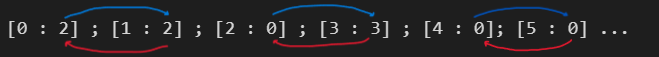

Ou seja, precisamos organizar para que o 'GP' do time mandante em uma partida, vá para a coluna 'GC' do time visitante na mesma partida, e assim por diante. Já que, na mesma partida, um gol realizado por um clube, obrigatoriamente foi contra o seu adversário em campo. O que resulta em:

```
[0 : 2] ; [1 : 2] ; [2 : 3] ; [3 : 0] ; [4 : 0]; [5 : 0] ...
```
Porém, não iremos alterar os valores em si, para reorganizar sua ordem de maneira mais fácil, vamos alterar a sequência de seus índices, já que sendo basicamente números conhecidos e crescentes, torna a manipulação mais simples de ser realizada. 

Seus valores atuais são:

```
1, 2, 3, 4, 5, 6, 7, 8, ...
```

E devem ser reorganizados para (basicamente invertendo a ordem de dois em dois números):

```
2, 1, 4, 3, 6, 5, 8, 7, ...
```
Assim, seus valores (Gols contra, no caso) irão ficar na ordem desejada, depois disso, resetamos o índice em sua ordem padrão.

In [8]:
# A ordem de números [2, 1, 4, 3, 6, 5, 8, 7, ...] é somente uma sequência de números pares e ímpares intercalados

# Criando a sequência de números pares:
pares = []
for i in range(0, 760):
  if i % 2 == 0:
    pares.append(i)
  else:
    continue

# E de números ímpares:
impares = []
for j in range(0, 760):
  if j % 2 != 0:
    impares.append(j)
  else:
    continue

# Intercalando os valores de ambas as listas
intercalacao = [val for pair in zip(impares, pares) for val in pair]

In [9]:
# Validando a sequência dos índices
print(intercalacao)

[1, 0, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 21, 20, 23, 22, 25, 24, 27, 26, 29, 28, 31, 30, 33, 32, 35, 34, 37, 36, 39, 38, 41, 40, 43, 42, 45, 44, 47, 46, 49, 48, 51, 50, 53, 52, 55, 54, 57, 56, 59, 58, 61, 60, 63, 62, 65, 64, 67, 66, 69, 68, 71, 70, 73, 72, 75, 74, 77, 76, 79, 78, 81, 80, 83, 82, 85, 84, 87, 86, 89, 88, 91, 90, 93, 92, 95, 94, 97, 96, 99, 98, 101, 100, 103, 102, 105, 104, 107, 106, 109, 108, 111, 110, 113, 112, 115, 114, 117, 116, 119, 118, 121, 120, 123, 122, 125, 124, 127, 126, 129, 128, 131, 130, 133, 132, 135, 134, 137, 136, 139, 138, 141, 140, 143, 142, 145, 144, 147, 146, 149, 148, 151, 150, 153, 152, 155, 154, 157, 156, 159, 158, 161, 160, 163, 162, 165, 164, 167, 166, 169, 168, 171, 170, 173, 172, 175, 174, 177, 176, 179, 178, 181, 180, 183, 182, 185, 184, 187, 186, 189, 188, 191, 190, 193, 192, 195, 194, 197, 196, 199, 198, 201, 200, 203, 202, 205, 204, 207, 206, 209, 208, 211, 210, 213, 212, 215, 214, 217, 216, 219, 218, 221, 220,

Agora que temos a sequência de índice desejada, basta substituir o índice atual por esta nova lista.

In [10]:
# Os gols pró podem ser encontrados na coluna 'GP' da tabela 'df_gols', vamos criar uma outra tabela para reorganizar os índices e termos os gols contra 'GC'
df_gols2 = df_gols
df_gols2 = df_gols2.reindex(intercalacao).reset_index(drop = True)
df_gols2 = df_gols2.rename(columns = {'GP':'GC'})

In [11]:
# Validando
print(df_gols.head(10), '\n')
print(df_gols2.head(10))

   MatchId   GP
0        0  2.0
1        0  2.0
2        1  0.0
3        1  3.0
4        2  0.0
5        2  0.0
6        3  2.0
7        3  1.0
8        4  2.0
9        4  3.0 

   MatchId   GC
0        0  2.0
1        0  2.0
2        1  3.0
3        1  0.0
4        2  0.0
5        2  0.0
6        3  1.0
7        3  2.0
8        4  3.0
9        4  2.0


Pronto, é perceptível que, analisando individualmente por partida, os gols sofridos por um time estão iguais aos gols marcados pelo seu oponente.

In [12]:
# Adicionando ao DataFrame
df_clubes['GC'] = df_gols2['GC']
df_clubes.head(10)

,MatchId,Local,Clubes,GP,GC
0,0,Away,Juventude,2.0,2.0
1,0,Home,Cuiaba,2.0,2.0
2,1,Away,Santos,0.0,3.0
3,1,Home,Bahia,3.0,0.0
4,2,Away,Fluminense,0.0,0.0
5,2,Home,Sao Paulo,0.0,0.0
6,3,Away,Fortaleza,2.0,1.0
7,3,Home,Atletico-MG,1.0,2.0
8,4,Away,Gremio,2.0,3.0
9,4,Home,Ceara,3.0,2.0


Agora precisamos adicionar o sistema de pontuação de cada jogo.
  * 3 pontos, caso GP > GC.
  * 1 ponto, caso GP = GC.
  * 0 pontos, caso GP < GC.

Junto a isso, podemos adicionar uma coluna de saldo de gols 'SG', sendo a quantidade de gols marcados menos a quantidade de gols sofridos.

In [13]:
def pontuacao(x):
    if x > 0:
      return 3
    elif x == 0:
      return 1
    else:
      return 0

# Inserindo a coluna de Pontuação 'Pts'
df_clubes['Pts'] = (df_clubes['GP'] - df_clubes['GC']).apply(pontuacao)

#   Adicionando a coluna de saldo de gols 'SG'
df_clubes['SG'] = df_clubes['GP'] - df_clubes['GC']

# Validando
df_clubes.head(10)

,MatchId,Local,Clubes,GP,GC,Pts,SG
0,0,Away,Juventude,2.0,2.0,1,0.0
1,0,Home,Cuiaba,2.0,2.0,1,0.0
2,1,Away,Santos,0.0,3.0,0,-3.0
3,1,Home,Bahia,3.0,0.0,3,3.0
4,2,Away,Fluminense,0.0,0.0,1,0.0
5,2,Home,Sao Paulo,0.0,0.0,1,0.0
6,3,Away,Fortaleza,2.0,1.0,3,1.0
7,3,Home,Atletico-MG,1.0,2.0,0,-1.0
8,4,Away,Gremio,2.0,3.0,0,-1.0
9,4,Home,Ceara,3.0,2.0,3,1.0


Pronto, agora que temos todos os dados individuais dos clubes por partida, podemos criar a **Classificação do Campeonato** agregando o conjunto desses valores e dividindo-os pelas respectivas equipes.

In [14]:
# Adicionando as colunas de Pontos, Gols Pró, Gols Contra e Saldo de Gols, agrupando cada um desses valores pela soma por cada equipe
df_classificacao = df_clubes.groupby('Clubes').sum()

# Dropando a coluna de 'MatchId', que não é mais necessária e reordenando os clubes por ordem decrescente de pontos
df_classificacao = df_classificacao.drop(columns = 'MatchId', axis = 1).sort_values(by = ['Pts'], ascending = False)

# Já criamos as colunas que utilizaram 'sum()', agora vamos criar as colunas baseadas em 'count()'
df_classificacao['PJ'] = df_clubes.groupby('Clubes')['Pts'].count()
df_classificacao['V'] = df_clubes[df_clubes.Pts == 3].groupby('Clubes')['Pts'].count()
df_classificacao['E'] = df_clubes[df_clubes.Pts == 1].groupby('Clubes')['Pts'].count()
df_classificacao['D'] = df_clubes[df_clubes.Pts == 0].groupby('Clubes')['Pts'].count()
# Essas colunas são: Partidas Jogadas ('PJ'), Vitórias ('V'), Empates ('E') e Derroras ('D')

# Agora, podemos fazer a coluna de Aproveitamento ('Apr')
max_pontos = 38 * 3
## Alterar '38' para uma variável de Partidas Jogadas
df_classificacao['Apr'] = round(((df_classificacao['Pts'] / max_pontos) * 100), 1)
df_classificacao = df_classificacao.astype({'Apr':'str'})
df_classificacao['Apr'] = df_classificacao['Apr'] + '%'

# Reordenado as colunas para que fiquem em um padrão conhecido
df_classificacao = df_classificacao.iloc[:, [2, 4, 5, 6, 7, 8, 0, 1, 3]]

In [15]:
# Validando
df_classificacao

,Pts,PJ,V,E,D,Apr,GP,GC,SG
Clubes,,,,,,,,,
Atletico-MG,84,38,26,6,6,73.7%,67.0,34.0,33.0
Flamengo RJ,71,38,21,8,9,62.3%,69.0,36.0,33.0
Palmeiras,66,38,20,6,12,57.9%,58.0,43.0,15.0
Fortaleza,58,38,17,7,14,50.9%,44.0,45.0,-1.0
Corinthians,57,38,15,12,11,50.0%,40.0,36.0,4.0
Bragantino,56,38,14,14,10,49.1%,55.0,46.0,9.0
Fluminense,54,38,15,9,14,47.4%,38.0,38.0,0.0
America MG,53,38,13,14,11,46.5%,41.0,37.0,4.0
Atletico GO,53,38,13,14,11,46.5%,33.0,36.0,-3.0
